## Introduction

We'll be working with the `fandango_scores.csv` file, which can be downloaded from <a href="https://github.com/fivethirtyeight/data/tree/master/fandango">here</a>.

Here are the columns we'll be working with in this mission:
- `FILM` - film name
- `RT_user_norm` - average user rating from Rotten Tomatoes, normalized to a 1 to 5 point scale
- `Metacritic_user_nom` - average user rating from Metacritic, normalized to a 1 to 5 point scale
- `IMDB_norm` - average user rating from IMDB, normalized to a 1 to 5 point scale
- `Fandango_Ratingvalue` - average user rating from Fandango, normalized to a 1 to 5 point scale
- `Fandango_Stars` - the rating displayed on the Fandango website (rounded to nearest star, 1 to 5 point scale)

Instead of displaying the raw rating, the writer discovered that Fandango usually rounded the average rating to the next highest half star (next highest `0.5` value). The `Fandango_Ratingvalue` column reflects the true average rating while the `Fandango_Stars` column reflects the displayed, rounded rating.

In [1]:
import pandas as pd

reviews = pd.read_csv("data/fandango_scores.csv")
norm_reviews = reviews.filter(['FILM', 'RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars'], axis=1)
norm_reviews.iloc[0]

FILM                    Avengers: Age of Ultron (2015)
RT_user_norm                                       4.3
Metacritic_user_nom                               3.55
IMDB_norm                                          3.9
Fandango_Ratingvalue                               4.5
Fandango_Stars                                       5
Name: 0, dtype: object

### Bar Plot

The `RT_user_norm`, `Metacritic_user_nom`, `IMDB_norm`, and `Fandango_Ratingvalue` columns contain the average user rating for each movie, normalized to a 0 to 5 point scale. This allows us to compare how the users on each site rated a movie. While using averages isn't perfect because films with a few reviews can skew the average rating, FiveThirtyEight only selected movies with a non-trivial number of ratings to ensure films with only a handful of reviews aren't included.

Fandango ratings, both the actual and the displayed rating, are higher than those from the other sites for a given movie. While calculating and comparing summary statistics give us hard numbers for quantifying the bias, visualizing the data using plots can help us gain a more intuitive understanding. We need a visualization that scales graphical objects to the quantitative values we're interested in comparing. One of these visualizations is a __bar plot__.

An effective bar plot uses categorical values on one axis and numerical values on the other axis. Because bar plots can help us find the category corresponding to the smallest or largest values, it's important that we restrict the number of bars in a single plot. Using a bar plot to visualize hundreds of values makes it difficult to trace the category with the smallest or largest value.

If the x-axis contains the categorical values and the rectangular bars are scaled vertically, this is known as a vertical bar plot. A horizontal bar plot flips the axes, which is useful for quickly spotting the largest value.

An effective bar plot uses a consistent width for each bar. This helps keep the visual focus on the heights of the bars when comparing.

### Creating Bars

To create a useful bar plot, we need to specify the positions of the bars, the widths of the bars, and the positions of the axis labels.

We can generate a vertical bar plot using either pyplot.bar() or Axes.bar(). We'll use `Axes.bar()` so we can extensively customize the bar plot more easily. We can use pyplot.subplots() to first generate a single subplot and return both the Figure and Axes object.
```
fig, ax = plt.subplots()
```
The `Axes.bar()` method has 2 required parameters, `left` and `height`.
- We use the `left` parameter to specify the x coordinates of the left sides of the bar
    - Note that recent versions of Matplotlib use a modified syntax, substituting the parameter xfor the parameter left.
- We use the `height` parameter to specify the height of each bar. Both of these parameters accept a list-like object.

The np.arange() function returns evenly spaced values.
- We use `arange()` to generate the positions of the left side of our bars.
    - This function requires a parameter that specifies the number of values we want to generate.
    - We'll also want to add space between our bars for better readability

We can also use the `width` parameter to specify the width of each bar. This is an optional parameter and the width of each bar is set to `0.8` by default. The following code sets the width parameter to `1.5`:
```
ax.bar(bar_positions, bar_heights, 1.5)
```

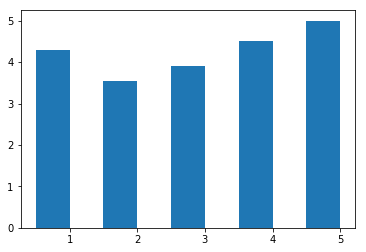

In [3]:
import matplotlib.pyplot as plt
from numpy import arange

num_cols = ["RT_user_norm", "Metacritic_user_nom", "IMDB_norm", "Fandango_Ratingvalue", "Fandango_Stars"]

bar_heights = norm_reviews[num_cols].iloc[0].values
bar_positions = arange(5) + 1

fig, ax = plt.subplots()

ax.bar(bar_positions, bar_heights, 0.5)
plt.show()

### Aligning Axis Ticks And Labels

By default, matplotlib sets the x-axis tick labels to the integer values the bars spanned on the x-axis (from 0 to 5). We only need tick labels on the x-axis where the bars are positioned. We can use `Axes.set_xticks()` to change the positions of the ticks to [1, 2, 3, 4, 5]

Then, we can use `Axes.set_xticklabels()` to specify the tick labels.

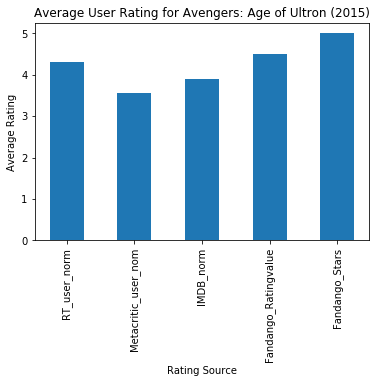

In [5]:
num_cols = ["RT_user_norm", "Metacritic_user_nom", "IMDB_norm", "Fandango_Ratingvalue", "Fandango_Stars"]
bar_heights = norm_reviews[num_cols].iloc[0].values
bar_positions = arange(5) + 1
tick_positions = range(1,6)
fig, ax = plt.subplots()

ax.bar(bar_positions, bar_heights, 0.5)
ax.set_xticks(tick_positions)
ax.set_xticklabels(num_cols, rotation=90)

ax.set_xlabel("Rating Source")
ax.set_ylabel("Average Rating")
ax.set_title("Average User Rating for Avengers: Age of Ultron (2015)")
plt.show()

### Horizontal Bar Plot

We can create a horizontal bar plot in matplotlib in a similar fashion. Instead of using `Axes.bar()`, we use `Axes.barh()`. This method has 2 required parameters, `bottom` and `width`. We use the bottom parameter to specify the y coordinate for the bottom sides for the bars and the `width` parameter to specify the lengths of the bars.

To recreate the bar plot from the last step as horizontal bar plot, we essentially need to map the properties we set for the y-axis instead of the x-axis. We use `Axes.set_yticks()` to set the y-axis tick positions to [1, 2, 3, 4, 5] and `Axes.set_yticklabels()` to set the tick labels to the column names.

In [ ]:
num_cols = ["RT_user_norm", "Metacritic_user_nom", "IMDB_norm", "Fandango_Ratingvalue", "Fandango_Stars"]
bar_heights = norm_reviews[num_cols].iloc[0].values
bar_positions = arange(5) + 1
tick_positions = range(1,6)
fig, ax = plt.subplots()

ax.bar(bar_positions, bar_heights, 0.5)
ax.set_xticks(tick_positions)
ax.set_xticklabels(num_cols, rotation=90)

ax.set_xlabel("Rating Source")
ax.set_ylabel("Average Rating")
ax.set_title("Average User Rating for Avengers: Age of Ultron (2015)")
plt.show()